In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [36]:
path = r"F:\Work\SOCAAutomation\Dataset\Images\VisibilityEstimation"
Files = os.listdir(path)
Files = sorted(Files, key = lambda x: int(os.path.splitext(x)[0]))

['1.png',
 '2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 '10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png']

In [37]:
grad_mag_list = []
for frame in Files:
    img = cv.imread(path + "/" + frame)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gradx = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=3)
    grady = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=3)
    grad_mag = cv.magnitude(gradx, grady)
    grad_mag_norm = cv.normalize(grad_mag, None, 0, 255, cv.NORM_MINMAX)
    comb_img = cv.addWeighted(gradx, 0.5, gradx, 0.5, 0)
    grad_mag_list.append(grad_mag_norm.sum())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '1.png'),
  Text(1, 0, '2.png'),
  Text(2, 0, '3.png'),
  Text(3, 0, '4.png'),
  Text(4, 0, '5.png'),
  Text(5, 0, '6.png'),
  Text(6, 0, '7.png'),
  Text(7, 0, '8.png'),
  Text(8, 0, '9.png'),
  Text(9, 0, '10.png'),
  Text(10, 0, '11.png'),
  Text(11, 0, '12.png'),
  Text(12, 0, '13.png'),
  Text(13, 0, '14.png')])

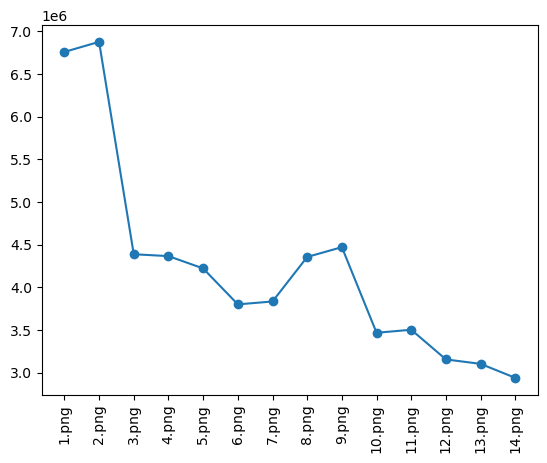

In [38]:
plt.plot(Files, grad_mag_list, marker='o')
plt.xticks(rotation=90)

In [30]:
image_files = [f for f in os.listdir(path) if f.endswith('.png')]

# Sort files numerically
imagefiles = sorted(image_files, key=lambda x: int(os.path.splitext(x)[0]))

In [35]:
os.path.splitext(image_files[1])[0]

'10'

(-0.5, 703.5, 575.5, -0.5)

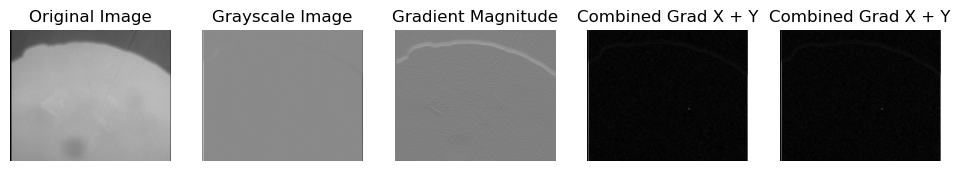

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 5, 1)
plt.title("Original Image")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 2)
plt.title("Grayscale Image")
plt.imshow(gradx, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 3)
plt.title("Gradient Magnitude")
plt.imshow(grady, cmap='gray')
plt.axis("off")

plt.subplot(1, 5, 4)
plt.title("Combined Grad X + Y")
#combined_grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)
plt.imshow(grad_mag, cmap='gray')  # Take absolute for visualization
plt.axis("off")

plt.subplot(1, 5, 5)
plt.title("Combined Grad X + Y")
#combined_grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)
plt.imshow(grad_mag_norm, cmap='gray')  # Take absolute for visualization
plt.axis("off")

In [41]:
grad_mag_norm.mean()

7.248764789051301

In [23]:
grad_mag_norm.flatten().sum()

6758862.61125278